Fazendo download da base

In [60]:
! wget "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"


--2021-11-08 11:52:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv.1’

winequality-red.csv 100%[===================>]  82.23K   316KB/s    in 0.3s    

2021-11-08 11:52:04 (316 KB/s) - ‘winequality-red.csv.1’ saved [84199/84199]



In [61]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

Carregando o CSV

In [62]:
raw_df = pd.read_csv("winequality-red.csv", delimiter=";", header=None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


Escolhido o target sendo a última coluna

In [63]:
X = raw_df.values[1:,0:-1]
y = raw_df.values[1:,-1]

#from sklearn.datasets import load_breast_cancer
#breast_cancer = load_breast_cancer()
#X, y = breast_cancer.data, breast_cancer.target

X, y

(array([['7.4', '0.7', '0', ..., '3.51', '0.56', '9.4'],
        ['7.8', '0.88', '0', ..., '3.2', '0.68', '9.8'],
        ['7.8', '0.76', '0.04', ..., '3.26', '0.65', '9.8'],
        ...,
        ['6.3', '0.51', '0.13', ..., '3.42', '0.75', '11'],
        ['5.9', '0.645', '0.12', ..., '3.57', '0.71', '10.2'],
        ['6', '0.31', '0.47', ..., '3.39', '0.66', '11']], dtype=object),
 array(['5', '5', '5', ..., '6', '5', '6'], dtype=object))

Analisando o target com cada caracteristica

0


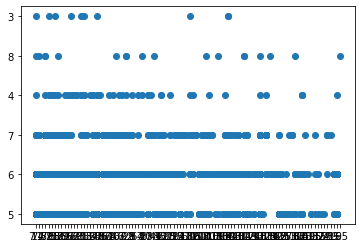

1


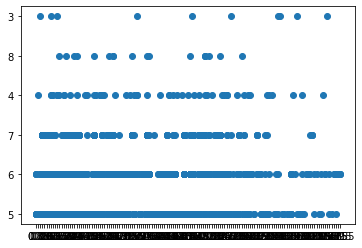

2


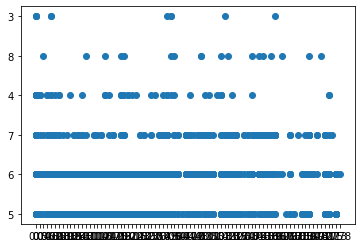

3


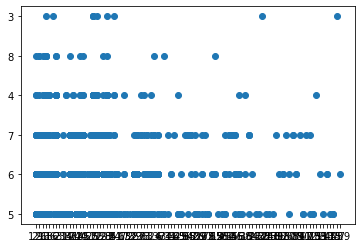

4


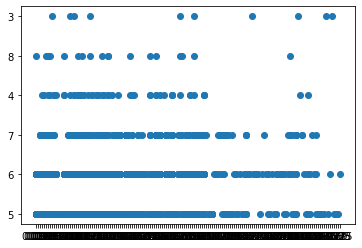

5


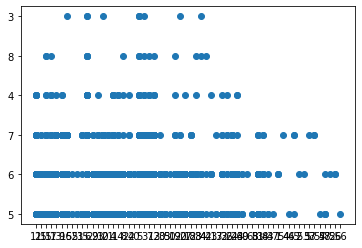

6


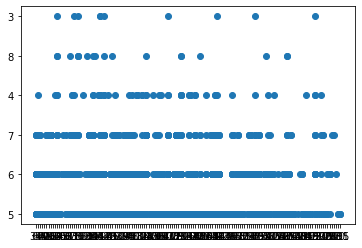

7


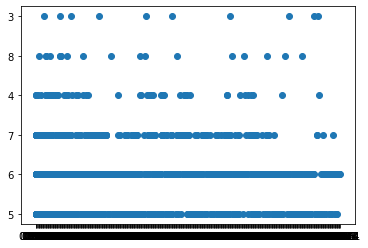

8


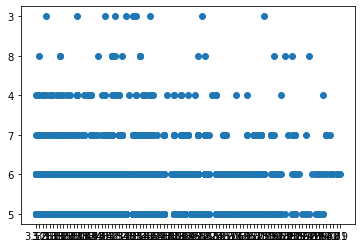

9


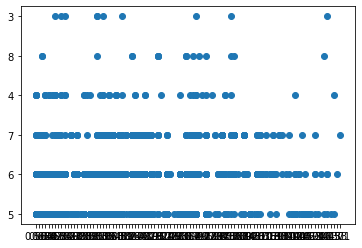

10


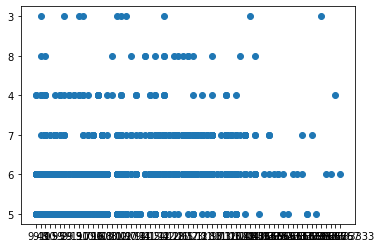

In [64]:
for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

In [65]:
modelo = LogisticRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

print("MSE:", mean_squared_error(y, ypred))
print("intercept_:", modelo.intercept_)
print("coef_:", modelo.coef_)

MSE: 0.5384615384615384
intercept_: [-0.00389798  0.02815953  0.51036845 -0.09017999 -0.38432809 -0.06012191]
coef_: [[ 1.14391734e-02  9.99245927e-02 -2.31740578e-02  5.02161449e-02
   1.03872112e-02  7.96113632e-02 -4.72825043e-02 -3.42588467e-03
   9.17877984e-03 -2.24053479e-02 -2.04093022e-01]
 [-2.35394180e-01  2.53778133e-01 -1.04432422e-01  2.42263544e-01
   8.41488601e-03 -3.48181767e-02  9.92808132e-03  2.79526244e-02
   1.73522982e-01 -5.81834256e-02  1.06820916e-02]
 [ 2.48605265e-01  9.93320966e-01 -4.98757511e-01 -1.26124426e-01
   1.05419544e-01 -2.36531322e-02  2.98076221e-02  5.08699373e-01
   1.79565506e+00 -3.86664697e-01 -7.47594347e-01]
 [ 1.04555729e-01 -4.20776434e-01  6.03847148e-02 -1.17965507e-01
  -2.75269057e-02  3.40490370e-03  1.04453452e-02 -8.91274464e-02
  -3.07268968e-01  2.03615160e-01  2.25821995e-01]
 [ 1.02899977e-01 -8.37123658e-01  5.02638728e-01  2.93241533e-03
  -8.27567557e-02  8.43246304e-03 -1.08767185e-04 -3.83938729e-01
  -1.43842702e+00  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
def plot_parabola(modelo, n, X, y, delta):
  erro_arr = []
  delta_arr = np.linspace(modelo.intercept_[n]-delta,modelo.intercept_[n]+delta, 100)

  inter_bkp = modelo.intercept_[n]

  for i in range(len(delta_arr)):
    modelo.intercept_[n] = delta_arr[i]
    ypred = modelo.predict(X)
    mse = mean_squared_error(y, ypred)
    erro_arr.append(mse)

  modelo.intercept_[n] = inter_bkp
  
  plt.plot(delta_arr,erro_arr)
  plt.show()

# Delta 10

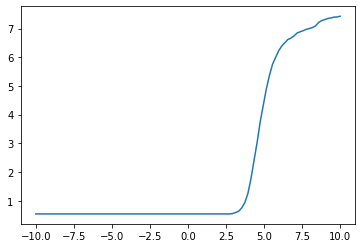

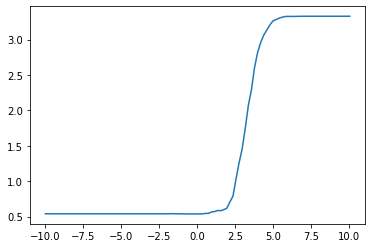

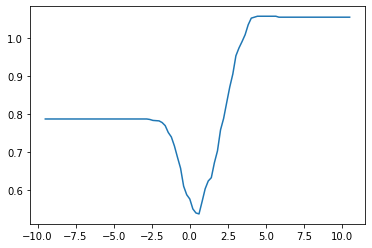

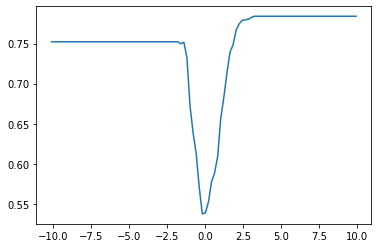

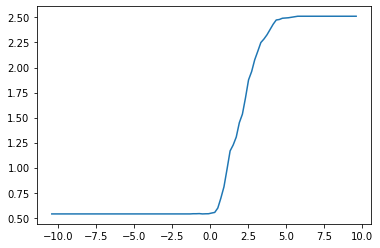

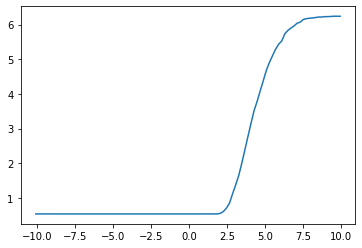

In [70]:
for i in range (len(modelo.intercept_)):
  plot_parabola(modelo, i, X, y, 10)

# Delta 5

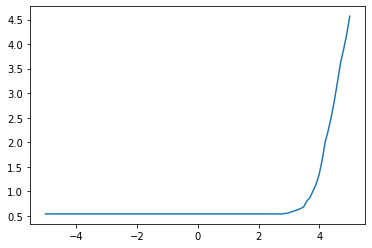

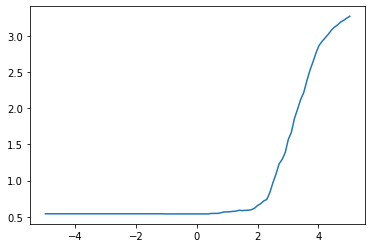

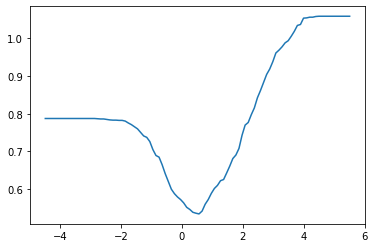

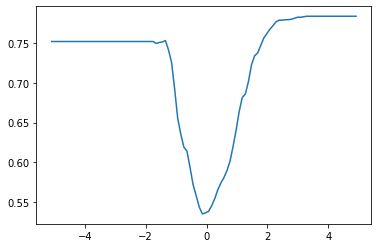

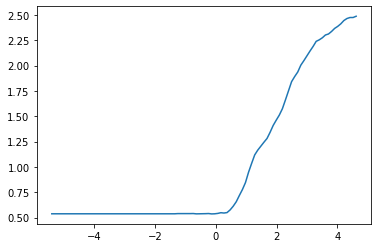

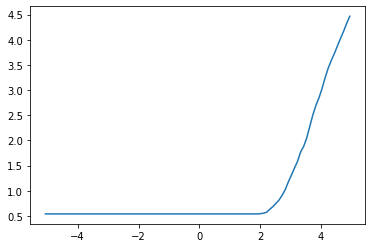

In [71]:
for i in range (len(modelo.intercept_)):
  plot_parabola(modelo, i, X, y, 5)

# Delta 15

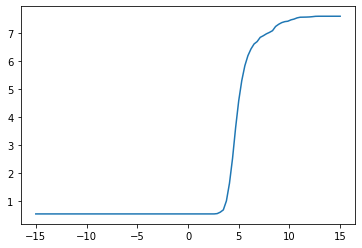

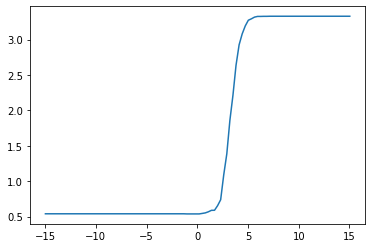

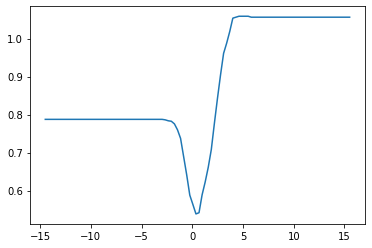

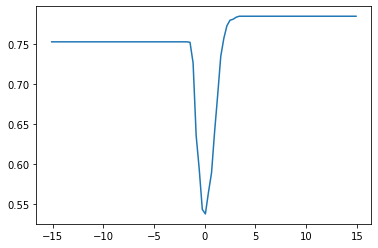

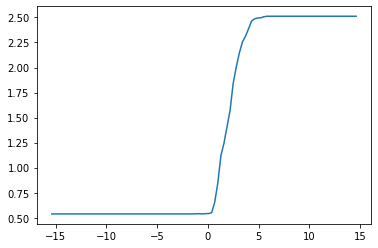

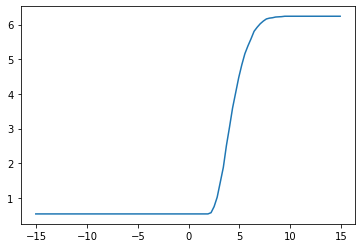

In [72]:
for i in range (len(modelo.intercept_)):
  plot_parabola(modelo, i, X, y, 15)